### Import required Libraries

In [1]:

import torch
from torch import nn
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from vocabulary import Vocabulary,iVocabulary

### NextWord pediction MLP architeture 

In [ ]:


class NextWord(nn.Module):
    def __init__(self, block_size, vocab_size, emb_dim, hidden_size):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.lin1 = nn.Linear(block_size * emb_dim, hidden_size)
        self.lin2 = nn.Linear(hidden_size, vocab_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.emb(x)
        x = x.view(x.shape[0], -1)
        x = self.relu(self.lin1(x))
        x = self.lin2(x)
        return x

### Load the required model from the 12 models generated

In [ ]:

block_size = 15  
vocab_size = len(Vocabulary)  
emb_dim = 128  
hidden_size = 1024  
act_fn = 'tanh'

loaded_model = NextWord(block_size, vocab_size, emb_dim, hidden_size)
loaded_model.load_state_dict(
    torch.load(f'models_1k/model1k_{emb_dim}_{block_size}_{act_fn}.pth', map_location='cpu')
)


### Visualize the Synonyms, Antonyms, Names, Pronouns, Verbs, Adverbs, Unrelated words from the vocabulary

C:\Users\Shiva\AppData\Local\Temp\ipykernel_20440\3370869254.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f'models_1k/model1k_{emb_dim}_{block_size}_{act_

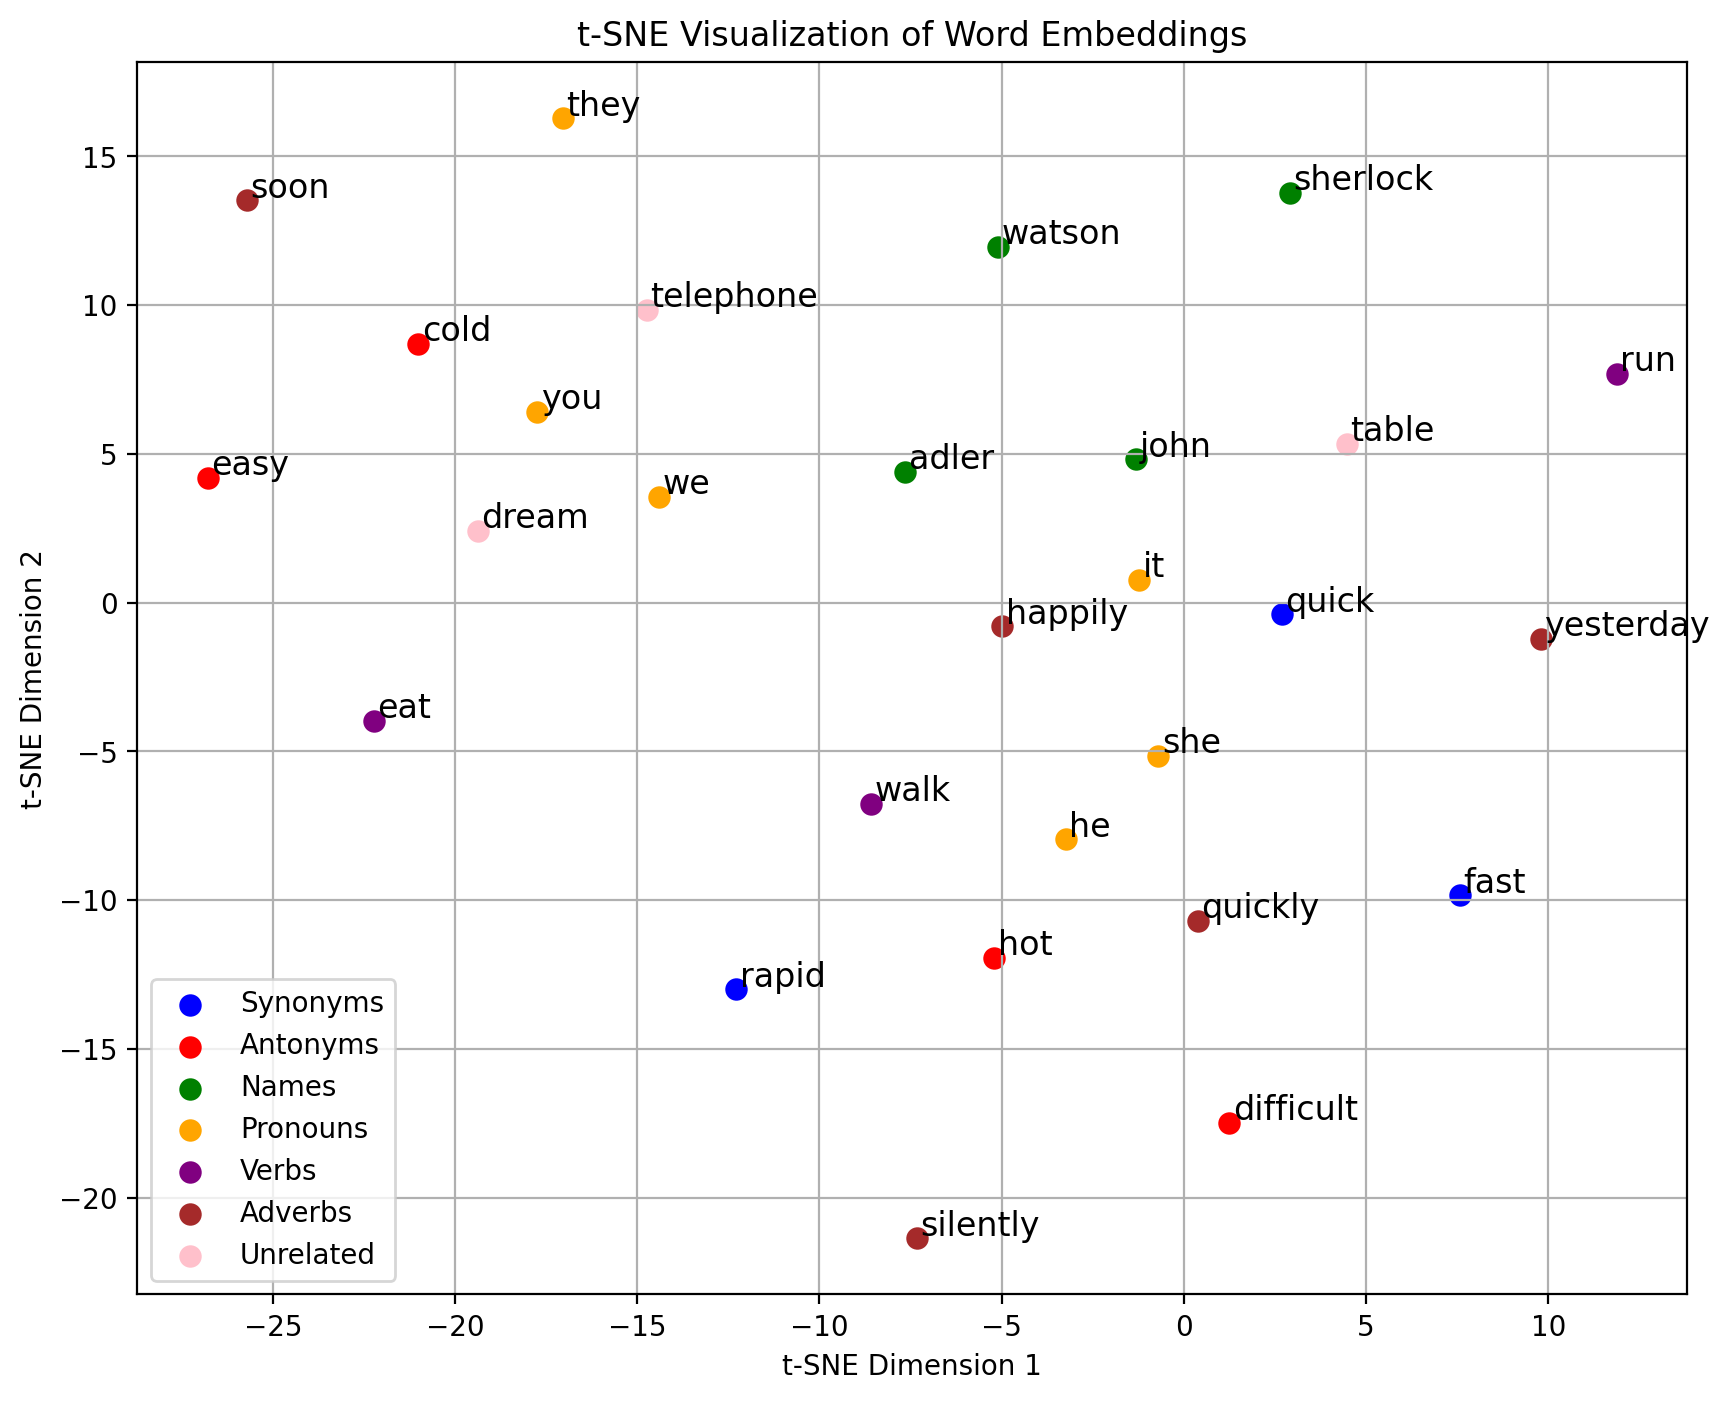

In [37]:

block_size = 15  
vocab_size = len(Vocabulary)  
emb_dim = 128  
hidden_size = 1024  
act_fn = 'tanh'

loaded_model = NextWord(block_size, vocab_size, emb_dim, hidden_size)
loaded_model.load_state_dict(
    torch.load(f'models_1k/model1k_{emb_dim}_{block_size}_{act_fn}.pth', map_location='cpu')
)

# Get the embedding layer
emb = loaded_model.emb

# Sample words and their categories
sample_words = {
    "Synonyms": ["fast", "quick", "rapid"],
    "Antonyms": ["hot", "cold", "easy", "difficult"],
    "Names": ["sherlock", "watson", "john","adler"],
    "Pronouns": ["he", "she", "it", "they", "we", "you"],
    "Verbs": ["walk", "eat", "run"],
    "Adverbs": ["quickly", "silently", "happily", "yesterday","soon"],
    "Unrelated": ["table", "dream", "telephone"]
}

# Define colors for each category
colors = {
    "Synonyms": "blue",
    "Antonyms": "red",
    "Names": "green",
    "Pronouns": "orange",
    "Verbs": "purple",
    "Adverbs": "brown",
    "Unrelated": "pink"
}

# Extract embeddings for all words
all_words = [word for category in sample_words.values() for word in category]
sample_embeddings = torch.stack([emb(torch.tensor(Vocabulary[word])).detach() for word in all_words]).numpy()

# Apply t-SNE to reduce embeddings to 2D
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
embeddings_2d = tsne.fit_transform(sample_embeddings)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))

# Plot each word with the corresponding color
start_idx = 0
for category, words in sample_words.items():
    end_idx = start_idx + len(words)
    plt.scatter(
        embeddings_2d[start_idx:end_idx, 0], embeddings_2d[start_idx:end_idx, 1], 
        color=colors[category], label=category, s=50
    )
    for i, word in enumerate(words):
        plt.text(embeddings_2d[start_idx + i, 0] + 0.1, embeddings_2d[start_idx + i, 1] + 0.1, word, fontsize=12)
    start_idx = end_idx

plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(loc='best')
plt.grid(True)
plt.show()


C:\Users\Shiva\AppData\Local\Temp\ipykernel_20440\914302131.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f'models_1k/model1k_{emb_dim}_{block_size}_{act_f

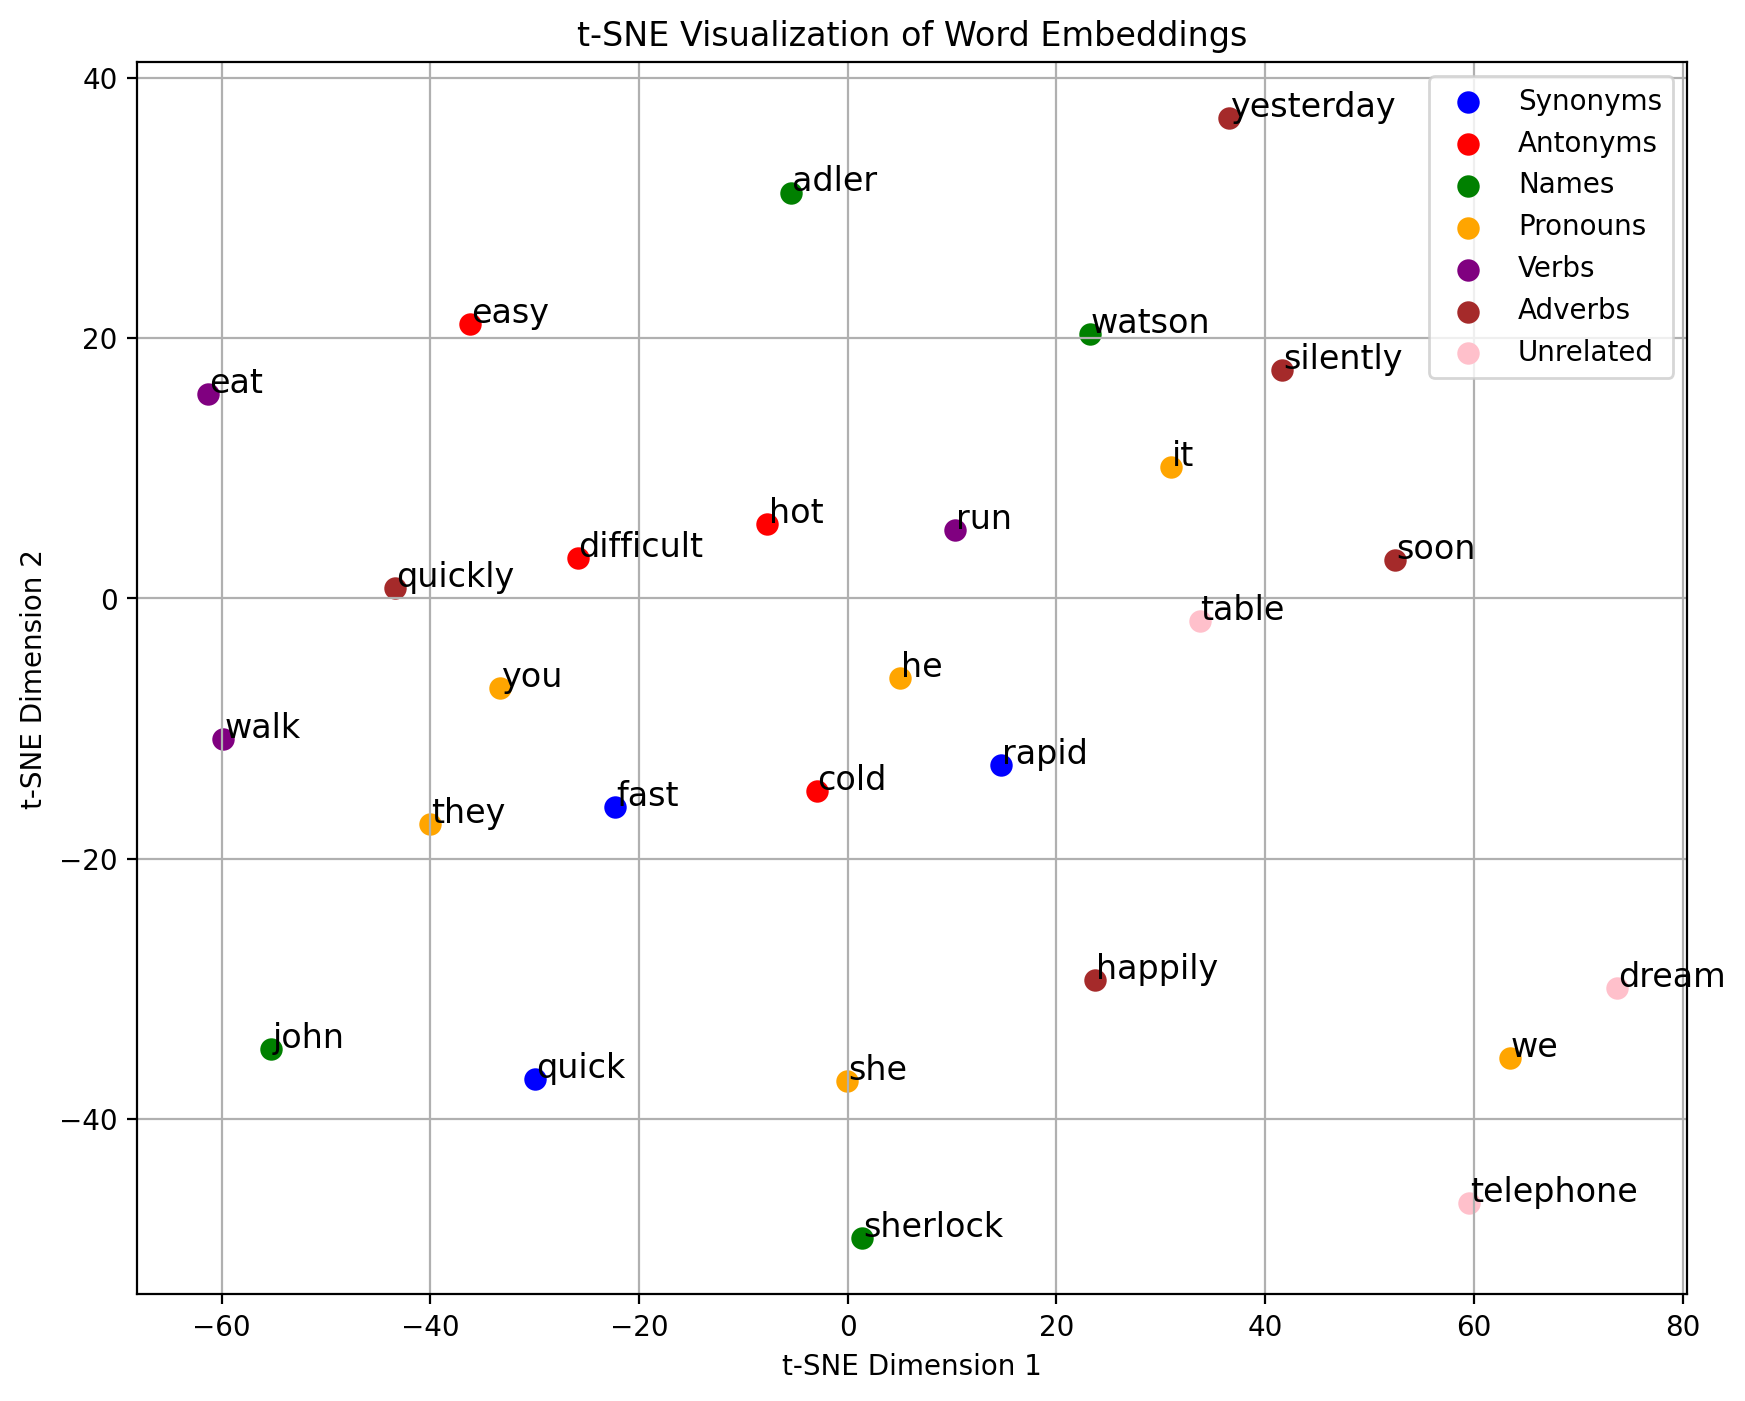

In [38]:


# Load the model
block_size = 5  
vocab_size = len(Vocabulary)  
emb_dim = 128  
hidden_size = 1024  
act_fn = 'tanh'

loaded_model = NextWord(block_size, vocab_size, emb_dim, hidden_size)
loaded_model.load_state_dict(
    torch.load(f'models_1k/model1k_{emb_dim}_{block_size}_{act_fn}.pth', map_location='cpu')
)

# Get the embedding layer
emb = loaded_model.emb

# Sample words and their categories
sample_words = {
    "Synonyms": ["fast", "quick", "rapid"],
    "Antonyms": ["hot", "cold", "easy", "difficult"],
    "Names": ["sherlock", "watson", "john","adler"],
    "Pronouns": ["he", "she", "it", "they", "we", "you"],
    "Verbs": ["walk", "eat", "run"],
    "Adverbs": ["quickly", "silently", "happily", "yesterday","soon"],
    "Unrelated": ["table", "dream", "telephone"]
}

# Define colors for each category
colors = {
    "Synonyms": "blue",
    "Antonyms": "red",
    "Names": "green",
    "Pronouns": "orange",
    "Verbs": "purple",
    "Adverbs": "brown",
    "Unrelated": "pink"
}

# Extract embeddings for all words
all_words = [word for category in sample_words.values() for word in category]
sample_embeddings = torch.stack([emb(torch.tensor(Vocabulary[word])).detach() for word in all_words]).numpy()

# Apply t-SNE to reduce embeddings to 2D
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
embeddings_2d = tsne.fit_transform(sample_embeddings)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))

# Plot each word with the corresponding color
start_idx = 0
for category, words in sample_words.items():
    end_idx = start_idx + len(words)
    plt.scatter(
        embeddings_2d[start_idx:end_idx, 0], embeddings_2d[start_idx:end_idx, 1], 
        color=colors[category], label=category, s=50
    )
    for i, word in enumerate(words):
        plt.text(embeddings_2d[start_idx + i, 0] + 0.1, embeddings_2d[start_idx + i, 1] + 0.1, word, fontsize=12)
    start_idx = end_idx

plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(loc='best')
plt.grid(True)
plt.show()


### From this 2 plots we can comment that the contect length is large then the model is learning symatics of the words better compare to the small context length